In [1]:
# Read in pangenome file
# import brewer2mpl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import *
from scipy import *
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch
import numpy as np
# from mnist import MNIST
import matplotlib.pyplot as plt
import os

In [2]:
## Load in metada tafile
# 1. read metadata;
# smp_2_size, smp_2_donor
smp_2_size = {}
smp_2_donor = {}
smp_2_species = {}
smp_2_align = {}
species_2_phylum = {}
smp_2_phylum={}
Filtered_Species_smplist={}
Filtered_Species_donorlist={}
Filtered_Species_sizelist={}
with open('../Intermediary-files/filtered_samples.csv') as file:
    for line in file:
        if 'GenomeSize' not in line:
            smp, sp, size, donor, align, phylum = line.strip().split(',')[0],line.strip().split(',')[1], int(line.strip().split(',')[2]), line.strip().split(',')[3],line.strip().split(',')[4],line.strip().split(',')[7]
            smp_2_size[smp] = size
            smp_2_donor[smp] = donor
            smp_2_species[smp]=sp
            smp_2_align[smp]=align
            smp_2_phylum[smp]=phylum
            species_2_phylum[sp]=phylum
            if sp not in Filtered_Species_smplist:
                Filtered_Species_smplist[sp]=[]
                Filtered_Species_donorlist[sp]={}
                Filtered_Species_sizelist[sp]=[]
            Filtered_Species_smplist[sp].append(smp)
            Filtered_Species_sizelist[sp].append(size)
            if donor not in Filtered_Species_donorlist[sp]:
                Filtered_Species_donorlist[sp][donor]=[]
            Filtered_Species_donorlist[sp][donor].append(smp)
## 2. Read in ANI-distance matrix
import numpy as np

# Create distance matrix with ones
smplist = list(smp_2_species.keys())
dist_matrix = np.ones((len(smplist), len(smplist)))

# Create a dictionary for quick lookup of smplist indices
smplist_dict = {smp: idx for idx, smp in enumerate(smplist)}

# Open the file for reading
with open('../Intermediary-files/ANI.table.allpairs.list') as g:
    for i, line in enumerate(g):
        tmp = line.strip().split('\t')
        smp1 = tmp[0].split('.')[0]
        smp2 = tmp[1].split('.')[0]
        dist = float(tmp[2])
        idx_1 = smplist_dict.get(smp1)
        idx_2 = smplist_dict.get(smp2)
        if idx_1 is not None and idx_2 is not None:
            dist_matrix[idx_1, idx_2] = dist
            dist_matrix[idx_2, idx_1] = dist
        if i % 1000000 == 0:
            print(i)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000
59000000
60000000
61000000
62000000
63000000
64000000
65000000
66000000
67000000
68000000
69000000
70000000
71000000
72000000
73000000
74000000
75000000
76000000
77000000
78000000
79000000
80000000
81000000
82000000
83000000
84000000
85000000
86000000
87000000
88000000
89000000


In [3]:
# Define colors for phyla
phylum_colors = {
    'Bacteroidetes': '#4D9394',
    'Actinobacteria': '#F7CC7B',
    'Proteobacteria': '#ABABAB',
    'Firmicutes': '#F2BFB8'
}

In [4]:
## Load the data of each species:
HR_datastructure_by_sp = {}
SNP_datastructure_by_sp = {}
ANI_datastructure_by_sp = {}
Overlap_datastructure_by_sp={}
x=[]
y=[]
for sp in species_2_phylum:
    file_path = '../Intermediary-files/snp-hr-list/'+sp+'.comb.txt'
    print(file_path)
    if os.path.exists(file_path):
        HR_datastructure_by_sp[sp]={}
        ANI_datastructure_by_sp[sp]={}
        SNP_datastructure_by_sp[sp]={}
        Overlap_datastructure_by_sp[sp]={}
        with open(file_path) as g:
            lines = g.readlines()
            for line in lines:
                tmp = line.split('\n')[0].split('\t')
                smp1 = tmp[0]
                smp2 = tmp[1]
                if len(tmp)>=4:
                    if smp1 in smp_2_donor and smp2 in smp_2_donor:
                        donor1 = smp_2_donor[tmp[0]]
                        donor2 = smp_2_donor[tmp[1]]
                        idx_1 = smplist_dict.get(smp1)
                        idx_2 = smplist_dict.get(smp2)
                        dist=dist_matrix[idx_1, idx_2]
                        snp = int(tmp[3])
                        overlap = int(tmp[2])
        
                        if donor1 not in HR_datastructure_by_sp[sp]:
                            HR_datastructure_by_sp[sp][donor1]={}
                            ANI_datastructure_by_sp[sp][donor1]={}
                            SNP_datastructure_by_sp[sp][donor1]={}
                            Overlap_datastructure_by_sp[sp][donor1]={}
                        HR_datastructure_by_sp[sp][donor1][smp1+'+'+smp2]=[]
                        ANI_datastructure_by_sp[sp][donor1][smp1+'+'+smp2]=dist
                        SNP_datastructure_by_sp[sp][donor1][smp1+'+'+smp2]=snp
                        Overlap_datastructure_by_sp[sp][donor1][smp1+'+'+smp2]=overlap
                        if int(tmp[4])>0:
                            for hr in tmp[5:]:
                                HR_datastructure_by_sp[sp][donor1][smp1+'+'+smp2].append(hr)

../Intermediary-files/snp-hr-list/Bacteroides_uniformis.comb.txt
../Intermediary-files/snp-hr-list/Bacteroides_thetaiotaomicron.comb.txt
../Intermediary-files/snp-hr-list/Parabacteroides_distasonis.comb.txt
../Intermediary-files/snp-hr-list/Bacteroides_ovatus.comb.txt
../Intermediary-files/snp-hr-list/Parabacteroides_merdae.comb.txt
../Intermediary-files/snp-hr-list/Phocaeicola_vulgatus.comb.txt
../Intermediary-files/snp-hr-list/Bacteroides_stercoris.comb.txt
../Intermediary-files/snp-hr-list/Bacteroides_caccae.comb.txt
../Intermediary-files/snp-hr-list/Alistipes_shahii.comb.txt
../Intermediary-files/snp-hr-list/Bacteroides_finegoldii.comb.txt
../Intermediary-files/snp-hr-list/Alistipes_senegalensis.comb.txt
../Intermediary-files/snp-hr-list/Escherichia_coli.comb.txt
../Intermediary-files/snp-hr-list/Bifidobacterium_longum.comb.txt
../Intermediary-files/snp-hr-list/Parabacteroides_massiliensis.comb.txt
../Intermediary-files/snp-hr-list/Lacticaseibacillus_paracasei.comb.txt
../Intermedi

Bacteroides_uniformis 0.023809523809523808 2 84
Bacteroides_thetaiotaomicron 0.0 0 11
Parabacteroides_distasonis 0.014285714285714285 1 70


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Bacteroides_ovatus 0.0 0 30
Parabacteroides_merdae 0.03125 1 32
Phocaeicola_vulgatus 0.12 3 25
Bacteroides_caccae 0.0 0 10
Escherichia_coli 0.03125 6 192
Bifidobacterium_longum 0.6417910447761194 172 268
Lacticaseibacillus_paracasei 0.0 0 13
Bacteroides_cellulosilyticus 0.0 0 15
Collinsella_sp900541125 0.0 0 45
Bacteroides_xylanisolvens 0.0 0 14
Lacticaseibacillus_rhamnosus 0.09090909090909091 1 11
Bifidobacterium_adolescentis 0.5921052631578947 180 304
Bifidobacterium_pseudocatenulatum 0.1875 6 32
Bifidobacterium_catenulatum 0.0 0 10
Streptococcus_salivarius 0.0 0 22
Eggerthella_lenta 0.23529411764705882 4 17


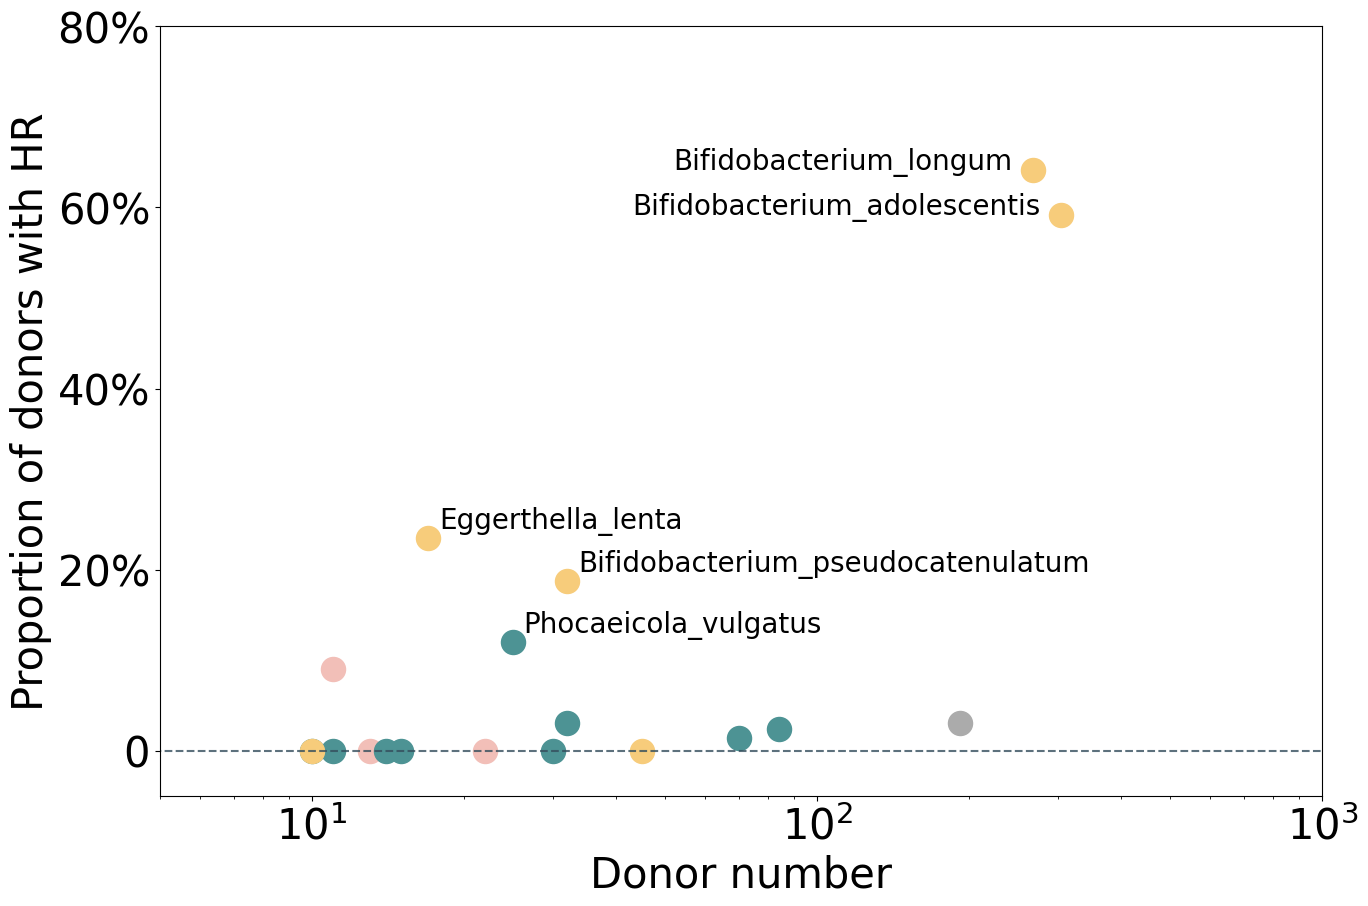

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))  # Set the width and height in inches
plt.plot([0,1000],[0,0],'--',color='#344E5C',alpha=0.8)

pair_cutoff = 10
perc_cutoff = 0.0
cap_pairs = 20000

pair_cutoff = 10
hr_ratio_cutoff = 30
hr_num_snp_cutoff = 30
hr_len_cutoff =500


HR_by_sp_summary={}

hr_dist=[]
no_hr_dist=[]
HR_fragment_size_by_sp={}
Percentage_pairs_with_HR_by_sp={}
SNPs_per_pair_with_HR_by_sp={}

for sp in HR_datastructure_by_sp:
    Percentage_pairs_with_HR_by_sp[sp]={}
    SNPs_per_pair_with_HR_by_sp[sp]={}
    tot_donor=0
    hr_donor=0
    HR_fragment_size_by_sp[sp]=[]
    for donor in HR_datastructure_by_sp[sp]:
        tot_pair_count=0
        hr_pair_count=0
        cap_record=0
        snp_hr_length=[]
        if len(HR_datastructure_by_sp[sp][donor])>=pair_cutoff:
            tot_donor+=1
            totpair = len(HR_datastructure_by_sp[sp][donor])
            hrpair = 0
            
            for pair in HR_datastructure_by_sp[sp][donor]:
                mk=0
                hr_total_len=0
                snp_hr_num=0
                for hr_candidate in HR_datastructure_by_sp[sp][donor][pair]:
                    length=int(hr_candidate.split(':')[1])-int(hr_candidate.split(':')[0])
                    ratio = float(hr_candidate.split(':')[3])
                    numsnp = int(hr_candidate.split(':')[2])
                    overlap = Overlap_datastructure_by_sp[sp][donor][pair]
                    if length>hr_len_cutoff and ratio > hr_ratio_cutoff and numsnp>hr_num_snp_cutoff and overlap > 1500000:
                        hrpair+=1
                        hr_total_len=hr_total_len+length
                        # break
                        mk=1
                        snp_hr_num += numsnp
                        
                if mk==0:
                    no_hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                    # print(HR_datastructure_by_sp[sp][donor][pair])
                else:
                    hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                    HR_fragment_size_by_sp[sp].append(hr_total_len)
                    hr_pair_count+=1
                    snp_hr_length.append(snp_hr_num)
                tot_pair_count+=1
                cap_record+=1
                
                if cap_record>cap_pairs:
                    break
            if hrpair/totpair > perc_cutoff:
                hr_donor+=1
        Percentage_pairs_with_HR_by_sp[sp][donor]=[hr_pair_count,tot_pair_count]
        SNPs_per_pair_with_HR_by_sp[sp][donor]=np.average(snp_hr_length)
    if tot_donor>=10:
        print(sp,hr_donor/tot_donor,hr_donor,tot_donor)
        HR_by_sp_summary[sp]=[hr_donor/tot_donor,tot_donor]
        phylum = species_2_phylum[sp]
        color = phylum_colors[phylum]
        plt.scatter(tot_donor,hr_donor/tot_donor,marker='o',s=300,color=color)
        if hr_donor/tot_donor>0.3:
            plt.text(tot_donor/1.1,hr_donor/tot_donor,sp,fontsize=20,horizontalalignment='right')
        elif hr_donor/tot_donor>0.1:
            plt.text(tot_donor*1.05,hr_donor/tot_donor+0.01,sp,fontsize=20,horizontalalignment='left')
        # if tot_donor>20 or hr_donor/tot_donor>0.1:
        #     plt.text(tot_donor,hr_donor/tot_donor,sp, rotation=30)

# Customize x-axis tick labels
x_ticks_positions = [10,100,1000]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = [0,0.2,0.4,0.6,0.8]  # Positions where custom labels will be placed
cus_y_ticks_positions = ["0","20%","40%","60%","80%"]

plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(5,1000)
plt.ylim(-0.05,0.8)
# Show the plot

plt.xscale('log')
plt.xlabel('Donor number',fontsize=30)
plt.ylabel('Proportion of donors with HR',fontsize=30)
fig.savefig('figures/Figure2G.pdf', dpi=600, bbox_inches='tight')

plt.show()

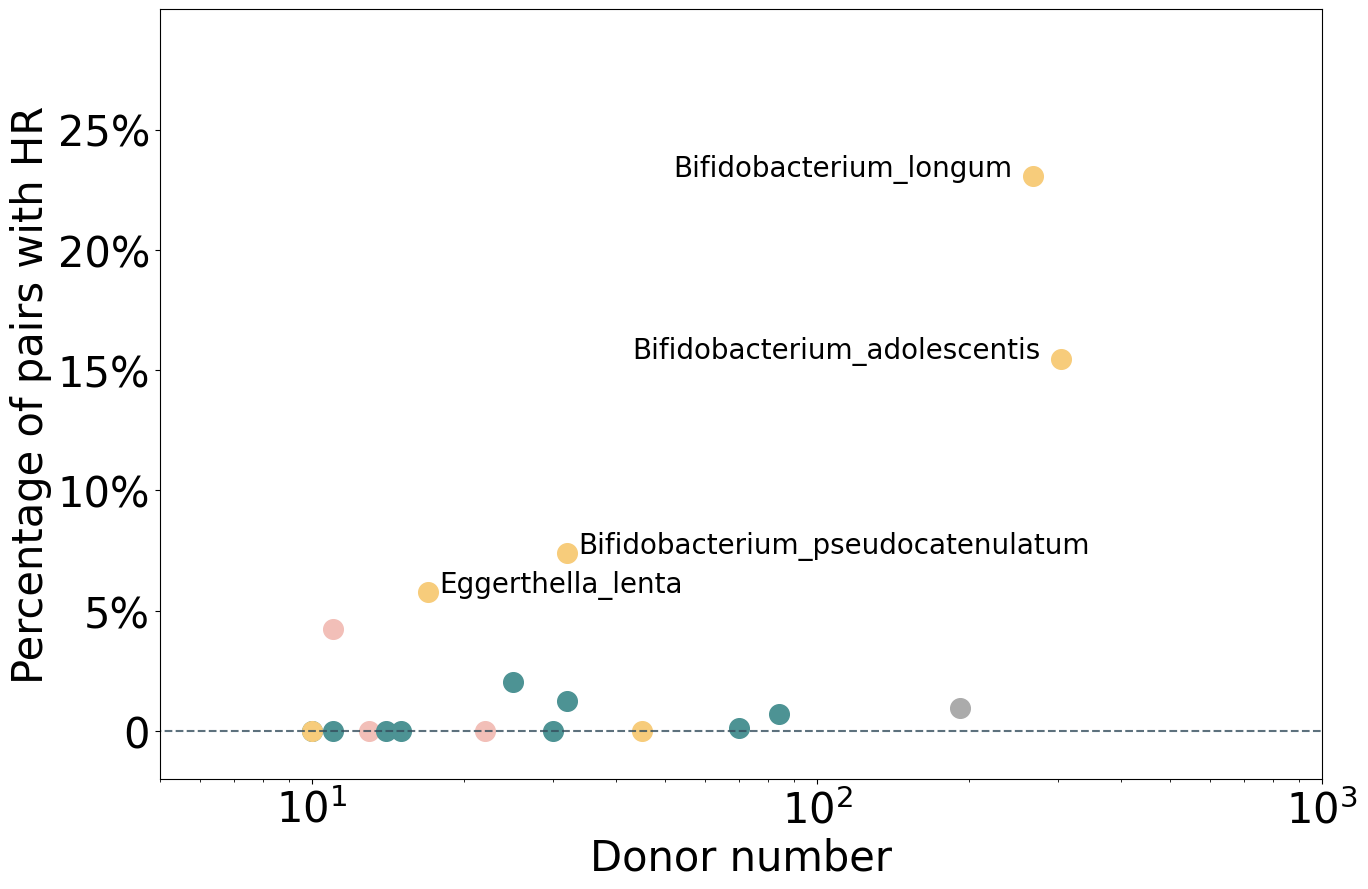

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))  # Set the width and height in inches
plt.plot([0,1000],[0,0],'--',color='#344E5C',alpha=0.8)

for sp in Percentage_pairs_with_HR_by_sp:
    lists=[]
    for donor in Percentage_pairs_with_HR_by_sp[sp]:
        a = Percentage_pairs_with_HR_by_sp[sp][donor][0]
        b = Percentage_pairs_with_HR_by_sp[sp][donor][1]
        if b>=10:
            lists.append(a/b)

    phylum = species_2_phylum[sp]
    color = phylum_colors[phylum]
    if len(lists)>9:
        HR_by_sp_summary[sp].append(np.average(lists))
        plt.scatter(len(lists),np.average(lists),marker='o',s=200,color=color)
        if np.average(lists)>0.1:
            plt.text(len(lists)/1.1,np.average(lists),sp,fontsize=20,horizontalalignment='right')
        elif np.average(lists)>0.05:
            plt.text(len(lists)*1.05,np.average(lists),sp,fontsize=20,horizontalalignment='left')
plt.xscale('log')

# Customize x-axis tick labels
x_ticks_positions = [10,100,1000]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = [0,0.05,0.1,0.15,0.2,0.25]  # Positions where custom labels will be placed
cus_y_ticks_positions = ["0","5%","10%","15%","20%","25%"]

plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(5,1000)
plt.ylim(-0.02,0.3)
# Show the plot

plt.xscale('log')
plt.xlabel('Donor number',fontsize=30)
plt.ylabel('Percentage of pairs with HR',fontsize=30)
fig.savefig('figures/Figure2F.pdf', dpi=600, bbox_inches='tight')

plt.show()


In [7]:
with open('Table-S2.csv', 'w') as f:
    f.write('Species, Donors with at least 5 isolates passing filters, Percentage pairs with HR, Percentage donors with HR\n')
    for sp, summary in HR_by_sp_summary.items():
        f.write(f"{sp},")
        f.write(f"{summary[1]},")
        f.write(f"{summary[2]*100:.2f},")
        f.write(f"{summary[0]*100:.2f}\n")


Bifidobacterium_longum 0.6194029850746269 166 268


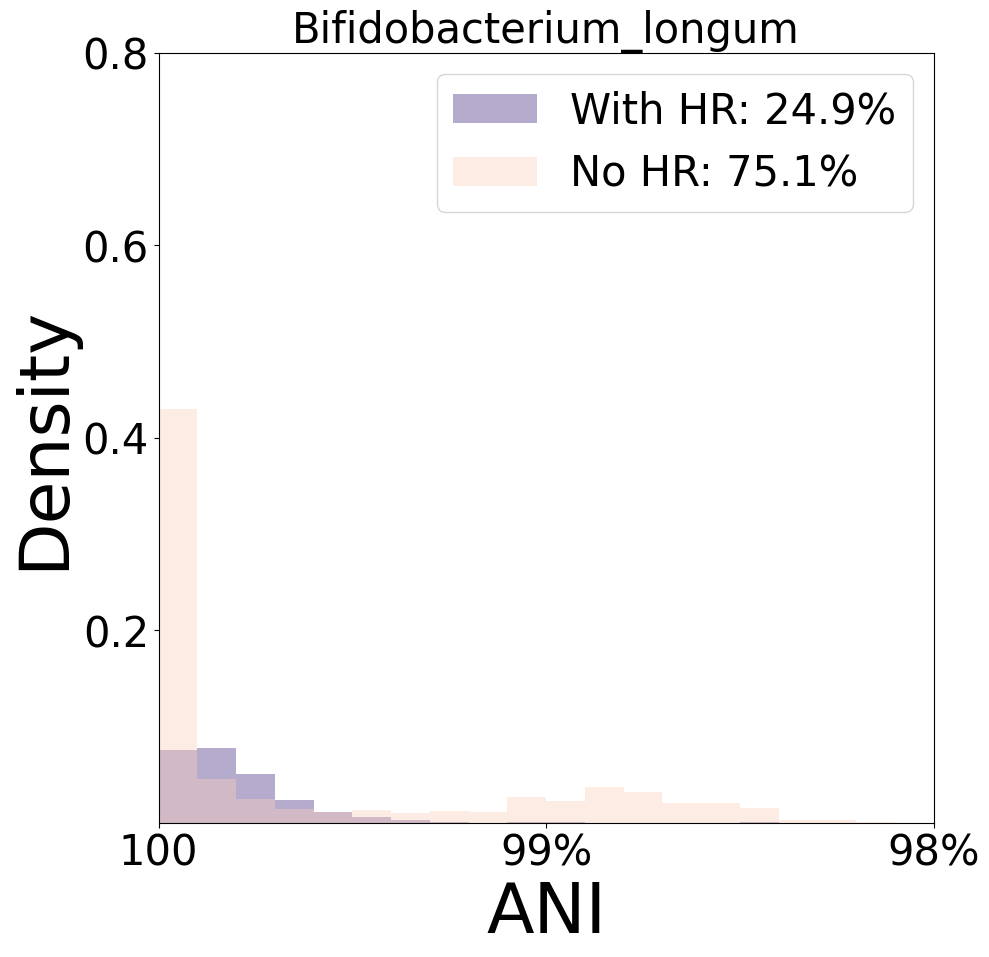

In [17]:
# pair_cutoff = 5
# hr_ratio_cutoff = 20
# hr_num_snp_cutoff = 20
# hr_len_cutoff =2000
# perc_cutoff = 0.0
hr_dist=[]
no_hr_dist=[]
tot_dist=[]


cap_pairs = 20

for sp in ['Bifidobacterium_longum']:
    tot_donor=0
    hr_donor=0
    for donor in HR_datastructure_by_sp[sp]:
        if len(HR_datastructure_by_sp[sp][donor])>=pair_cutoff:
            tot_donor+=1
            totpair = len(HR_datastructure_by_sp[sp][donor])
            hrpair = 0

            cap_record=0
            for pair in HR_datastructure_by_sp[sp][donor]:
                mk=0
                for hr_candidate in HR_datastructure_by_sp[sp][donor][pair]:
                    length=int(hr_candidate.split(':')[1])-int(hr_candidate.split(':')[0])
                    ratio = float(hr_candidate.split(':')[3])
                    numsnp = int(hr_candidate.split(':')[2])
                    if length>hr_len_cutoff and ratio > hr_ratio_cutoff and numsnp>hr_num_snp_cutoff:
                        hrpair+=1
                        mk=1
                if mk==0:
                    no_hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                    # if 0.01<ANI_datastructure_by_sp[sp][donor][pair]:
                    #     print(HR_datastructure_by_sp[sp][donor][pair])
                else:
                    hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                tot_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                cap_record+=1
                if cap_record>cap_pairs:
                    break
            if hrpair/totpair > perc_cutoff:
                hr_donor+=1
            
    if tot_donor>0:
        print(sp,hr_donor/tot_donor,hr_donor,tot_donor)
        phylum = species_2_phylum[sp]
        color = phylum_colors[phylum]
# Define custom bin edges
bin_edges = np.linspace(0, 0.02, 20)  # Adjust the bin edges as needed

percentage = len(hr_dist)/len(tot_dist)*100
perc1 = '{:.1f}'.format(percentage)
perc2 = '{:.1f}'.format(100-percentage)

fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches



import matplotlib.pyplot as plt
import numpy as np

# Define custom bin edges
bin_edges = np.linspace(0, 0.03, 31)  # Adjust the bin edges as needed

# Create density distribution plots with custom bins
counts_within1, bins, _ =plt.hist(hr_dist, bins=bin_edges, density=False, alpha=0.4, label='With HR: '+str(perc1)+'%', color='#472f83')
counts_within2, bins, _ =plt.hist(no_hr_dist, bins=bin_edges, density=False, alpha=0.4, label='No HR: '+str(perc2)+'%', color='#FCD0BA')
# plt.hist(tot_dist, bins=bin_edges, density=False, alpha=0.4, label='all', color='lightblue')

legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)


# Add labels and a legend
plt.xlabel('ANI', fontsize=50)
plt.ylabel('Density', fontsize=50)
legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*(sum(counts_within1)+sum(counts_within2)))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)




# Modify the x-axis to display percentages
plt.xlim(0,0.02)
plt.ylim(0,0.8*(sum(counts_within1)+sum(counts_within2)))
# plt.ylim(0,0.8)

# plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
plt.title(sp,fontsize=30)
fig.savefig('figures/FigureS2D.pdf', dpi=600, bbox_inches='tight')

plt.show()



Bifidobacterium_adolescentis 0.4967105263157895 151 304


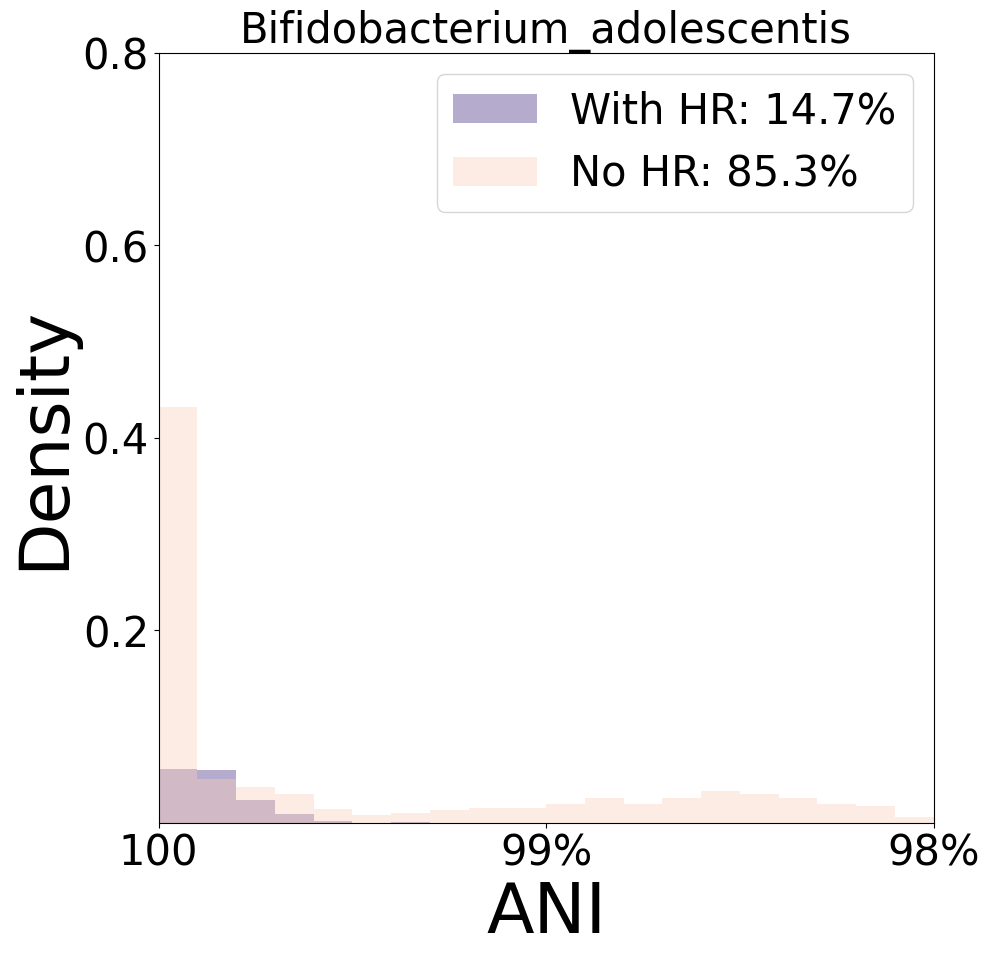

In [18]:
# pair_cutoff = 5
# hr_ratio_cutoff = 20
# hr_num_snp_cutoff = 20
# hr_len_cutoff =2000
# perc_cutoff = 0.0
hr_dist=[]
no_hr_dist=[]
tot_dist=[]


cap_pairs = 20

for sp in ['Bifidobacterium_adolescentis']:
    tot_donor=0
    hr_donor=0
    for donor in HR_datastructure_by_sp[sp]:
        if len(HR_datastructure_by_sp[sp][donor])>=pair_cutoff:
            tot_donor+=1
            totpair = len(HR_datastructure_by_sp[sp][donor])
            hrpair = 0

            cap_record=0
            for pair in HR_datastructure_by_sp[sp][donor]:
                mk=0
                for hr_candidate in HR_datastructure_by_sp[sp][donor][pair]:
                    length=int(hr_candidate.split(':')[1])-int(hr_candidate.split(':')[0])
                    ratio = float(hr_candidate.split(':')[3])
                    numsnp = int(hr_candidate.split(':')[2])
                    if length>hr_len_cutoff and ratio > hr_ratio_cutoff and numsnp>hr_num_snp_cutoff:
                        hrpair+=1
                        mk=1
                if mk==0:
                    no_hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                    # if 0.01<ANI_datastructure_by_sp[sp][donor][pair]:
                    #     print(HR_datastructure_by_sp[sp][donor][pair])
                else:
                    hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                tot_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                cap_record+=1
                if cap_record>cap_pairs:
                    break
            if hrpair/totpair > perc_cutoff:
                hr_donor+=1
            
    if tot_donor>0:
        print(sp,hr_donor/tot_donor,hr_donor,tot_donor)
        phylum = species_2_phylum[sp]
        color = phylum_colors[phylum]
# Define custom bin edges
bin_edges = np.linspace(0, 0.02, 20)  # Adjust the bin edges as needed

percentage = len(hr_dist)/len(tot_dist)*100
perc1 = '{:.1f}'.format(percentage)
perc2 = '{:.1f}'.format(100-percentage)

fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches



import matplotlib.pyplot as plt
import numpy as np

# Define custom bin edges
bin_edges = np.linspace(0, 0.03, 31)  # Adjust the bin edges as needed

# Create density distribution plots with custom bins
counts_within1, bins, _ =plt.hist(hr_dist, bins=bin_edges, density=False, alpha=0.4, label='With HR: '+str(perc1)+'%', color='#472f83')
counts_within2, bins, _ =plt.hist(no_hr_dist, bins=bin_edges, density=False, alpha=0.4, label='No HR: '+str(perc2)+'%', color='#FCD0BA')
# plt.hist(tot_dist, bins=bin_edges, density=False, alpha=0.4, label='all', color='lightblue')

legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)


# Add labels and a legend
plt.xlabel('ANI', fontsize=50)
plt.ylabel('Density', fontsize=50)
legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*(sum(counts_within1)+sum(counts_within2)))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)




# Modify the x-axis to display percentages
plt.xlim(0,0.02)
plt.ylim(0,0.8*(sum(counts_within1)+sum(counts_within2)))

# plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
plt.title(sp,fontsize=30)
fig.savefig('figures/FigureS2C.pdf', dpi=600, bbox_inches='tight')

plt.show()



Bacteroides_uniformis 0.023809523809523808 2 84


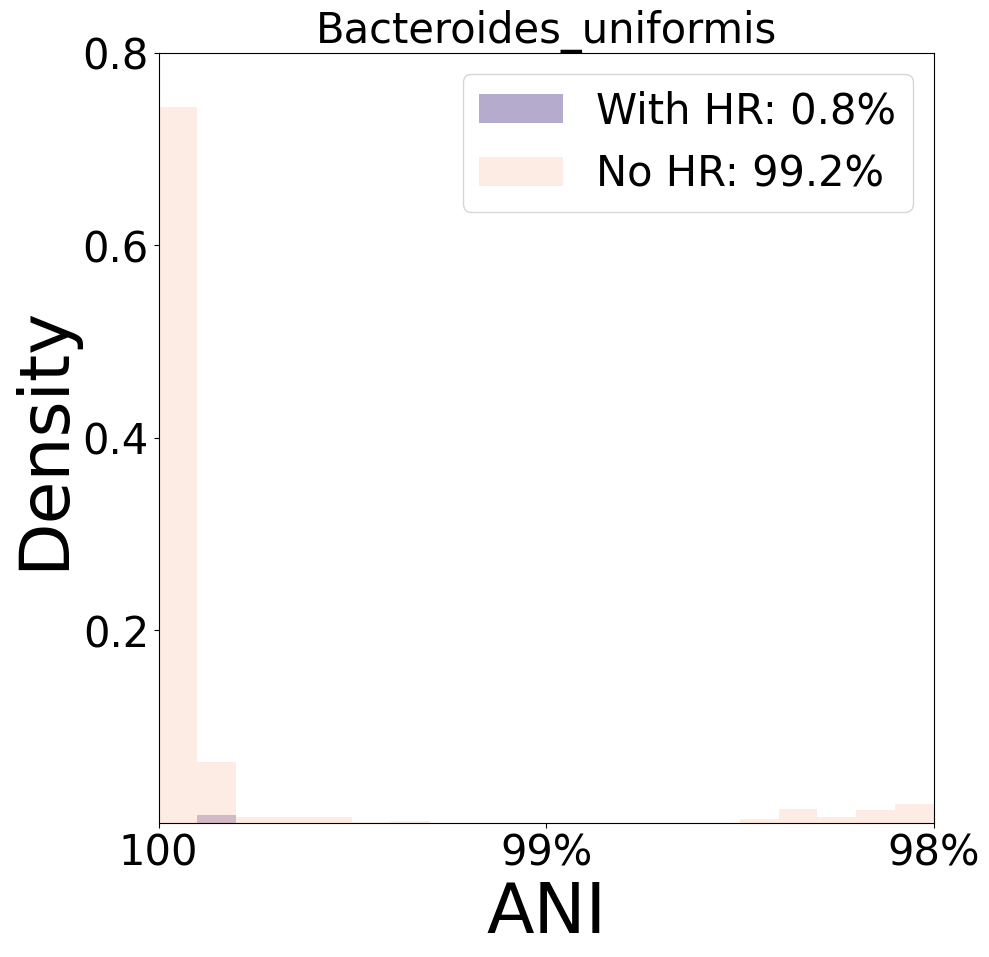

In [19]:
# pair_cutoff = 5
# hr_ratio_cutoff = 20
# hr_num_snp_cutoff = 20
# hr_len_cutoff =2000
# perc_cutoff = 0.0
hr_dist=[]
no_hr_dist=[]
tot_dist=[]


cap_pairs = 20

for sp in ['Bacteroides_uniformis']:
    tot_donor=0
    hr_donor=0
    for donor in HR_datastructure_by_sp[sp]:
        if len(HR_datastructure_by_sp[sp][donor])>=pair_cutoff:
            tot_donor+=1
            totpair = len(HR_datastructure_by_sp[sp][donor])
            hrpair = 0

            cap_record=0
            for pair in HR_datastructure_by_sp[sp][donor]:
                mk=0
                for hr_candidate in HR_datastructure_by_sp[sp][donor][pair]:
                    length=int(hr_candidate.split(':')[1])-int(hr_candidate.split(':')[0])
                    ratio = float(hr_candidate.split(':')[3])
                    numsnp = int(hr_candidate.split(':')[2])
                    if length>hr_len_cutoff and ratio > hr_ratio_cutoff and numsnp>hr_num_snp_cutoff:
                        hrpair+=1
                        mk=1
                if mk==0:
                    no_hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                    # if 0.01<ANI_datastructure_by_sp[sp][donor][pair]:
                    #     print(HR_datastructure_by_sp[sp][donor][pair])
                else:
                    hr_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                tot_dist.append(ANI_datastructure_by_sp[sp][donor][pair])
                cap_record+=1
                if cap_record>cap_pairs:
                    break
            if hrpair/totpair > perc_cutoff:
                hr_donor+=1
            
    if tot_donor>0:
        print(sp,hr_donor/tot_donor,hr_donor,tot_donor)
        phylum = species_2_phylum[sp]
        color = phylum_colors[phylum]
# Define custom bin edges
bin_edges = np.linspace(0, 0.02, 20)  # Adjust the bin edges as needed

percentage = len(hr_dist)/len(tot_dist)*100
perc1 = '{:.1f}'.format(percentage)
perc2 = '{:.1f}'.format(100-percentage)

fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches



import matplotlib.pyplot as plt
import numpy as np

# Define custom bin edges
bin_edges = np.linspace(0, 0.03, 31)  # Adjust the bin edges as needed

# Create density distribution plots with custom bins
counts_within1, bins, _ =plt.hist(hr_dist, bins=bin_edges, density=False, alpha=0.4, label='With HR: '+str(perc1)+'%', color='#472f83')
counts_within2, bins, _ =plt.hist(no_hr_dist, bins=bin_edges, density=False, alpha=0.4, label='No HR: '+str(perc2)+'%', color='#FCD0BA')
# plt.hist(tot_dist, bins=bin_edges, density=False, alpha=0.4, label='all', color='lightblue')

legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)


# Add labels and a legend
plt.xlabel('ANI', fontsize=50)
plt.ylabel('Density', fontsize=50)
legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*(sum(counts_within1)+sum(counts_within2)))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)




# Modify the x-axis to display percentages
plt.xlim(0,0.02)
plt.ylim(0,0.8*(sum(counts_within1)+sum(counts_within2)))
# plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
plt.title(sp,fontsize=30)
fig.savefig('figures/FigureS2E.pdf', dpi=600, bbox_inches='tight')

plt.show()

